## TSNE 
Algorithm and Applications

In [27]:
from collections import OrderedDict
from functools import partial
from time import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import numpy as np

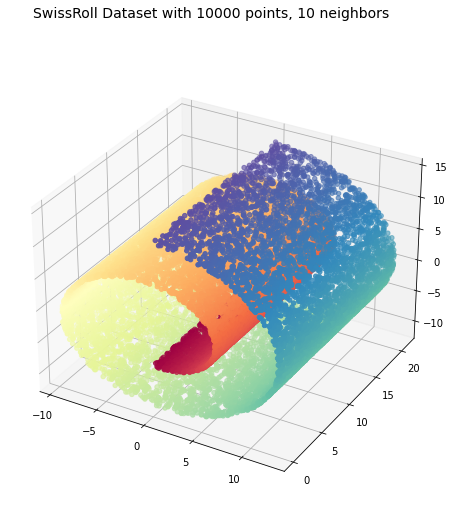

In [5]:
#This import is needed to silence pyflakes
Axes3D
#Then we load the swiss roll dataset
n_points = 20000
X, color = datasets.make_swiss_roll(n_points, random_state=0)
n_neighbors = 10
n_components = 3
# Creating the plot
fig = plt.figure(figsize=(15, 8))
fig.suptitle("SwissRoll Dataset with %i points, %i neighbors"
             % (10000, n_neighbors), fontsize=14)
# Adding 3d scatter plot
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)

## MNIST DATASET

In [6]:
mnist_train = pd.read_csv('Datasets/train.csv')   # dataset from Kaggle 

In [ ]:
mnist_train.shape()  # get size of the original high dimensional space 

In [18]:
filtered_df = mnist_train[(mnist_train['label'] == 1) | (mnist_train['label'] == 2) | (mnist_train['label'] == 3) | (mnist_train['label'] == 4)]
# Get the number of data points with label 1 and 2
n_label_1 = (filtered_df['label'] == 1).sum()
n_label_2 = (filtered_df['label'] == 2).sum()
n_label_3 = (filtered_df['label'] == 3).sum()
n_label_4 = (filtered_df['label'] == 4).sum()


# Determine the smaller of the two label counts
min_label_count = min(n_label_1, n_label_2, n_label_3, n_label_4)

# Randomly sample min_label_count rows for each label
filtered_df = pd.concat([
    filtered_df[filtered_df['label'] == 1].sample(n=250, random_state=42),
    filtered_df[filtered_df['label'] == 2].sample(n=250, random_state=42),
    filtered_df[filtered_df['label'] == 3].sample(n=250, random_state=42),
    filtered_df[filtered_df['label'] == 4].sample(n=250, random_state=42)
])
label = filtered_df["label"]
label.value_counts()

4    250
3    250
2    250
1    250
Name: label, dtype: int64

Text(0.5, 1.0, 'PCA applied on MNIST subset for Digits 1,2,3,4')

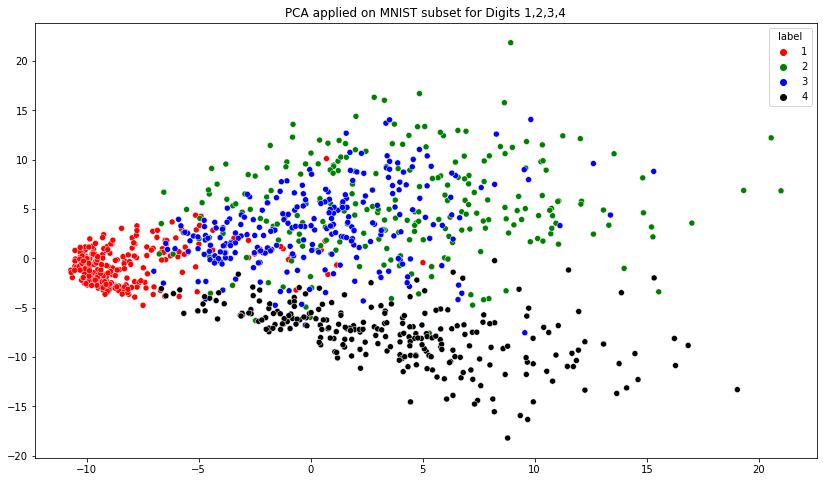

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
fig = plt.figure(1, figsize=(14,8))

filtered_df = StandardScaler().fit_transform(filtered_df)
pca = PCA(n_components=2)
pca_res = pca.fit_transform(filtered_df)
sns.scatterplot(x = pca_res[:,0], y = pca_res[:,1], hue = label, palette = ['r','g','b','k'], legend = 'full');
plt.title('PCA applied on MNIST subset for Digits 1,2,3,4')

Text(0.5, 1.0, 't-SNE applied on MNIST subset for Digits 1,2,3,4')

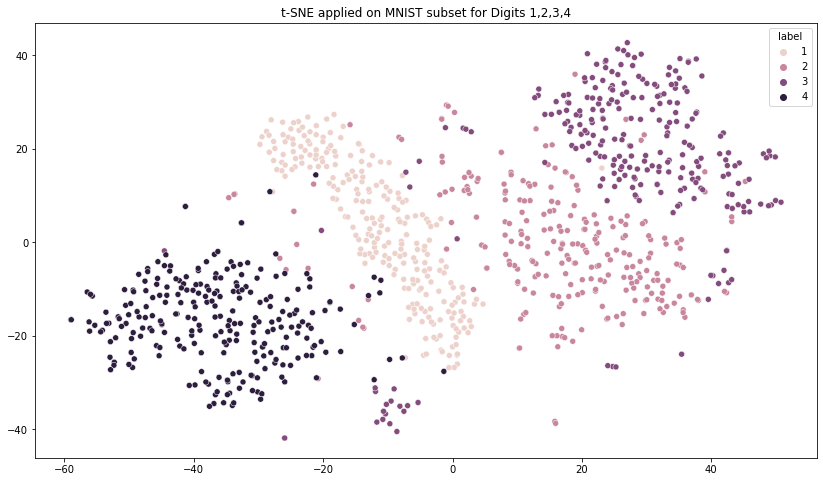

In [25]:
fig = plt.figure(1, figsize=(14,8))

from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, random_state=0)
tsne_res = tsne.fit_transform(filtered_df)

sns.scatterplot(x = tsne_res[:,0], y = tsne_res[:,1], hue = label, legend = 'full');
plt.title('t-SNE applied on MNIST subset for Digits 1,2,3,4')

In [31]:
# keep default parameters and vary perplexity
import time

perp1 = [5,10,15,20,25,30,35,40,50]
times1 = []
for i in tqdm(perp1):
    # we will keep 
    start_time=time.perf_counter()
    tsne = TSNE(n_components = 2, perplexity = i, random_state=0)
    data = tsne.fit_transform(filtered_df)
    end_time=time.perf_counter()
    times1.append(end_time-start_time)

# analyze time over various learning rate
learning_rates = np.arange(10,1000,10)
times2 = []
for i in tqdm(learning_rates):
    # we will keep 
    start_time=time.perf_counter()
    tsne = TSNE(n_components = 2, perplexity = 25, learning_rate=i, random_state=0)
    data = tsne.fit_transform(filtered_df)
    end_time=time.perf_counter()
    times2.append(end_time-start_time)

# analyze time over various niters 
n_iterations = np.arange(250,5000,500)
times3 = []
for i in tqdm(n_iterations):
    # we will keep 
    start_time=time.perf_counter()
    tsne = TSNE(n_components = 2, perplexity = 25, n_iter=i, random_state=0)
    data = tsne.fit_transform(filtered_df)
    end_time=time.perf_counter()
    times3.append(end_time-start_time)


100%|██████████| 10/10 [02:48<00:00, 16.85s/it]


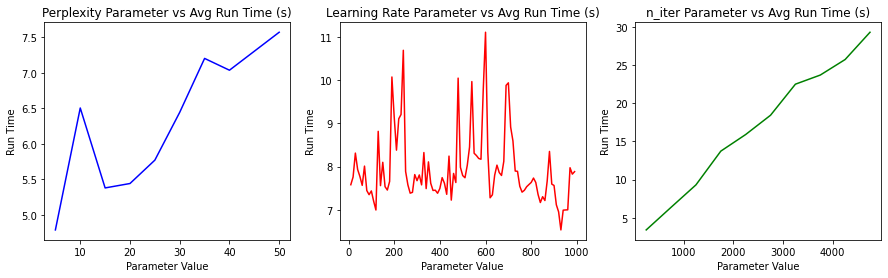

In [43]:
fig = plt.figure(1, figsize=(15,4))

plt.subplot(131)
plt.plot(perp1, times1, c='b')
plt.title('Perplexity Parameter vs Avg Run Time (s)')
plt.xlabel('Parameter Value')
plt.ylabel('Run Time')

plt.subplot(132)
plt.plot(learning_rates, times2, c='r')
plt.title('Learning Rate Parameter vs Avg Run Time (s)')
plt.xlabel('Parameter Value')
plt.ylabel('Run Time')

plt.subplot(133)
plt.plot(n_iterations, times3, c='g')
plt.title('n_iter Parameter vs Avg Run Time (s)')
plt.xlabel('Parameter Value')
plt.ylabel('Run Time')

plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

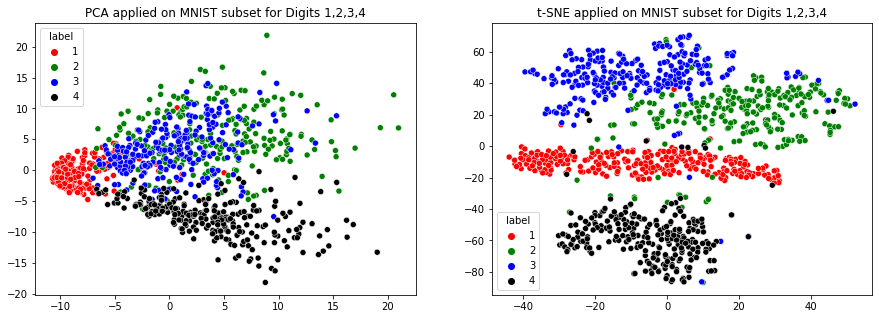

In [57]:
fig = plt.figure(1, figsize=(15,5))

plt.subplot(121)
filtered_df = StandardScaler().fit_transform(filtered_df)
pca = PCA(n_components=2)
pca_res = pca.fit_transform(filtered_df)
sns.scatterplot(x = pca_res[:,0], y = pca_res[:,1], hue = label, palette = ['r','g','b','k'], legend = 'full');
plt.title('PCA applied on MNIST subset for Digits 1,2,3,4')

plt.subplot(122)
tsne = TSNE(n_components = 2, perplexity = 25, n_iter = 2000, learning_rate = 200, random_state=0)
tsne_res = tsne.fit_transform(filtered_df)
sns.scatterplot(x = tsne_res[:,0], y = tsne_res[:,1], hue = label, palette = ['r','g','b','k'], legend = 'full');
plt.title('t-SNE applied on MNIST subset for Digits 1,2,3,4')

plt.show()